# Homework2 

In [4]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer

# Introduction : Linear Regression Analysis

First, we need to import the Quandl API.

Quandl has indexed millions of economics, financial, societal, and country specific datasets.

The datas are available through API(Application Porgramming Interface) supported by the Quandl Python package.

Before you start, you first need to install the Quandl API on your computer.

Open your 'cmd' console and type in the following command.
> pip install Quandl

If you have successfully installed the Quandl API,

you will have no further trouble in implementation as the other importation classes are already installed in your Anaconda package.

In [4]:
import Quandl

First we are going to test out the Quandl API.

If you execute the python code below, you can see that it retrieves stock prices for 50 weeks from now.

Go on and try out the code yourself.

In [5]:
def get_finance_data(query, auth_token, rows=50, column=4, sort_order="desc", collapse="weekly"):
    data = Quandl.get(query, 
                      rows=rows, 
                      column=column, 
                      sort_order=sort_order, 
                      collapse=collapse, 
                      authtoken=auth_token)
    
    return data['Close']

In [8]:
# Go to Quandl site, Sign up, and get your authorization token.
# To get the bunch of data, you must sign up for the page.
auth_token = 'Write your auth token here'

target_finance = [
    ('apple', 'GOOG/NASDAQ_AAPL'),
    ('yahoo', 'GOOG/NASDAQ_YHOO'),    
]

In [9]:
finance_data = {
    target[0]: get_finance_data(target[1], auth_token)
    for target in target_finance
}

Now, consist a single data frame which is indexed by the feature as the result below.

In [10]:
finance_df = pd.DataFrame(finance_data)
finance_df.describe()

,apple,yahoo
count,50.000000,50.000000
mean,113.762400,34.954000
std,11.000685,4.518003
min,93.990000,27.040000
25%,105.800000,31.732500
50%,113.370000,33.835000
75%,122.785000,37.607500
max,132.540000,44.750000


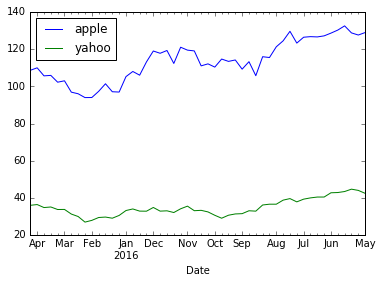

In [11]:
finance_df.plot()

You can see that the stock prices naturally have fluctuated throughout time.

Therefore, we are going to find another correlationship within the stock prices except the 'time' factor.

In this exercise, we are going to find the correlationship between stock prices of simular industries.

We'll start by plotting a scatter plot between the Apple stock prices and the Yahoo stock prices.

Add labels to both x and y axis.

In [12]:
def plot_2D_lr(x_data, y_data, pred=None, x_label='X', y_label='Y', title=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data)
    
    if pred is not None:
        plt.plot(x_data, pred, color='red', linewidth=2)
    if title is not None:
        plt.title(title)        
    
    plt.show()

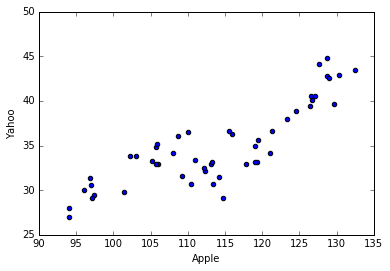

In [13]:
plot_2D_lr(finance_df.apple, finance_df.yahoo, x_label='Apple', y_label='Yahoo')

Now, fit in a first-degree regression line into the scatter data.
If you do, you can find out that the two stock prices during the past 50 weeks have a positive correlation.

X = [

    [val0_0, val0_1, val_0_2, ....],        : X0 -> Y0
    [val0_0, val0_1, val_0_2, ....],        : X1 -> Y1
    ...
]

In [14]:
lr = linear_model.LinearRegression()

X = [
    [val] for val in finance_df.apple
]

lr.fit(X, finance_df.yahoo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

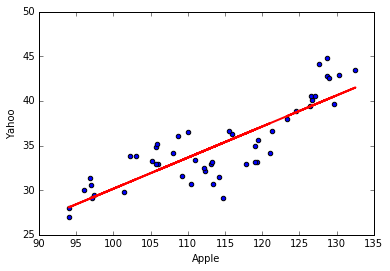

In [15]:
plot_2D_lr(finance_df.apple, finance_df.yahoo, lr.predict(X), 'Apple', 'Yahoo')

In [16]:
X = [  [val] for val in finance_df.apple.tolist() ]
Y = finance_df.yahoo.tolist()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

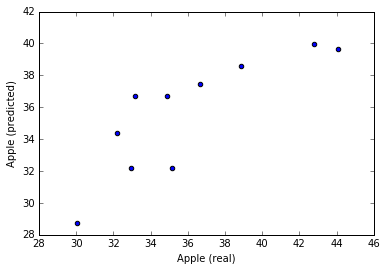

MSE - train: 5.51970340453
MSE - test: 6.00117024443


In [17]:
pred = lr.predict(x_test)
plot_2D_lr(y_test, pred,x_label='Apple (real)', y_label='Apple (predicted)')

print "MSE - train: %s" % mean_squared_error( lr.predict(x_train), y_train)
print "MSE - test: %s" % mean_squared_error( lr.predict(x_test), y_test)

## Example : Python Programming

In [18]:
class Finance_Analysis():
    def __init__(self, quandl_authkey, target_list):
        self.auth_key = quandl_authkey
        self.target_list = target_list
        
    def fetch_data(self, row_size=50):
        finance_data = {
            target[0]: get_finance_data(target[1], self.auth_key, row_size)
            for target in self.target_list
        }
        
        self.data = pd.DataFrame(finance_data)
        
    def fitting(self, train_index_name, target_index_name, split_ratio=0.2):
        X = [ [val] for val in self.data[train_index_name].tolist() ]
        Y = self.data[target_index_name].tolist()

        # X, Y -> train, test
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=split_ratio)
        
        # Linear Regression Fitting
        self.lr = linear_model.LinearRegression()
        self.lr.fit(x_train, y_train)
    
        pred = self.lr.predict(x_test)
        plot_2D_lr(x_train, y_train, lr.predict(x_train), train_index_name, target_index_name, title='Learning')
        
        self.evaluation(y_test, pred)
        
    def evaluation(self, real_values, pred_values):
        plot_2D_lr(real_values, pred_values,x_label='Real', y_label='Predicted', title='Prediction')
        print "MSE - test: %s" % mean_squared_error( pred_values, real_values)

In [19]:
finance_analysis = Finance_Analysis( 
    auth_token, 
    [
        ('apple', 'GOOG/NASDAQ_AAPL'),
        ('yahoo', 'GOOG/NASDAQ_YHOO')
    ]
)

finance_analysis.fetch_data(500)

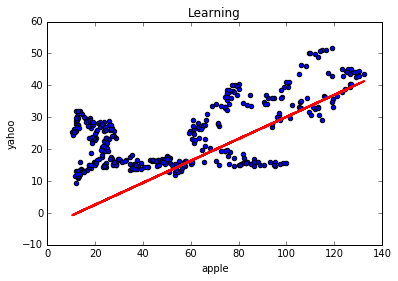

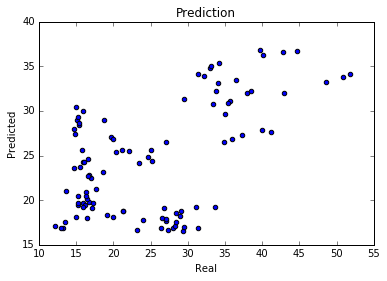

MSE - test: 66.7953881061


In [20]:
finance_analysis.fitting('apple', 'yahoo', 0.2)

## Problem1

From the previous example, we predicted y's price from the x's price.
That is, the model learned one dimension feature.

However, as we created Iinear regression model,  one feature is not enough for predicting the price.

What else we can do to improve the efficiency of the prediction?
Describe below.

-----------------------------------------
# Linear Regression Case : House Price Prediction
### (Multi-Dimension Feature)

Now, we are going to make new model to predict the House Price with various features.

This time, we'll use Boston's Price information.

In [21]:
from sklearn import datasets
boston = datasets.load_boston()

The data have already been created, with various features in it,

and you can see the features, below this block.

| Feature | Description |
|-----------------|-------------------------|
|CRIM|     per capita crime rate by town|
|ZN       |proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS|    proportion of non-retail business acres per town|
|CHAS  |   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|NOX    |  nitric oxides concentration (parts per 10 million)|
|RM    |   average number of rooms per dwelling|
|AGE   |   proportion of owner-occupied units built prior to 1940|
|DIS    |  weighted distances to five Boston employment centres|
|RAD   |   index of accessibility to radial highways|
|TAX   |   full-value property-tax rate per one thousand dollor |
|PTRATIO|  pupil-teacher ratio by town |
|B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT  |  % lower status of the population|

In [23]:
# Create Data
X = boston.data
Y = boston.target

print "Features\n", boston.feature_names
print 
print "Features: \n", X[0]
print "Target: \n", Y[0]

Features
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

Features: 
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
Target: 
24.0


13 features (['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']) consists of each samples.

The first sample is 
```
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
```
, 

and the target value, House Price is `24.0.`

--------------------------

# Problem2 

Before starting the linear regression model learning,

we'll divide given data with the ratio of 8:2,

which in order will be used as a training and a testing dataset.


In [8]:
# Write your code
# Don't use 'train_test_split' function in this problem
"""
x_train
x_test
y_train
y_test
"""

'\nx_train\nx_test\ny_train\ny_test\n'

# Problem3

Plot the house price distribution per each features,

and see what correlation exists between the price and each features. (Describe it.)

In [2]:
# Write your code

In [26]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
predicted = regr.predict(x_test)

# Problem4

Plot the result of price prediction.

> X-axis : Real value 
>
> Y-axis : Prediction value

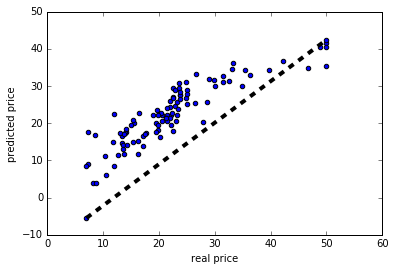

MSE - train: 22.3726066705
MSE - test: 20.8274164506


In [28]:
# Write your code here

print "MSE - train: %s" % mean_squared_error( regr.predict(x_train), y_train)
print "MSE - test: %s" % mean_squared_error(predicted, y_test)

------------------------------
# Classification Case : Restaurant Rating Prediction (NLP based)
### (feature generation)

From the previous example, we used Boston House Price data set, which already had features created.

Now, we are going to create features which will be used for making new model.

--------------------------------
In this example, we are going to predict the rating of a restaurant based on the users' __REVIEW__.

Review was written with the natural language. (numerical)

Therefore, we need to do some preprocessing step in order to make data for  and learning.

Most basically, we use BOW(Bag of word) as a feature, and some simple example is written below.

### Bag of Word (BOW)

In [7]:
example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print '# Original text is \n', '\n'.join(example_doc)

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print '# Word Vector\n', x

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Original text is 
This is the first sentence.
Creating BOW step by step.
This is the last sentence.
<class 'sklearn.feature_extraction.text.CountVectorizer'>
# Word Vector
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


-----------------------------------------------------------------

In [30]:
def load_json(data_path, limit=-1):
    data = list()
    
    f = open(data_path)
    for line in f:
        j = json.loads(line)
        data.append(j)
        
        if limit != -1 and len(data) > limit:
            break;
        
    return data

# Problem5

Let's load the uploaded data. [Donwload data](https://drive.google.com/file/d/0B560K5tENbB1SWdwbW82Ynhxck0/view?usp=sharing)

_When you get whole data, you need memory about up to 7G. Thus, you need to adjust the size of the data loaded, based on your PC's performance!_

In [32]:
data_path = "Write yelp sample data path"
data = load_json(data_path, "Write data size (int)")

data = pd.DataFrame(data)

In [33]:
data.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,reviews,stars,state,type
0,"{u'Wheelchair Accessible': True, u'Take-out': ...",s5yzZITWU_RcJzWOgjFecw,"[Restaurants, Italian]",Las Vegas,"1955 E Tropicana Ave\nEastside\nLas Vegas, NV ...","{u'Monday': {u'close': u'22:00', u'open': u'15...",36.100414,-115.126583,Sergio's Italian Gardens,"[Eastside, Southeast]",True,"[{u'votes': {u'funny': 0, u'useful': 0, u'cool...",4.0,NV,business
1,"{u'Price Range': 2, u'Alcohol': u'full_bar', u...",0_J4y0aEmtuzgdsH2OfWQw,"[Bars, Nightlife, Lounges]",Las Vegas,"517 Fremont St\nSte A\nDowntown\nLas Vegas, NV...","{u'Tuesday': {u'close': u'03:00', u'open': u'2...",36.168666,-115.140099,Don't Tell Mama,[Downtown],True,"[{u'votes': {u'funny': 0, u'useful': 1, u'cool...",4.0,NV,business
2,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",W0eocyGliMbg8NScqERaiA,"[Champagne Bars, Bars, Nightlife, Lounges]",Scottsdale,Scottsdale Quarter\n15257 N Scottsdale Rd\nSco...,"{u'Tuesday': {u'close': u'22:00', u'open': u'1...",33.607183,-111.940325,Narcisse Champagne and Tea Lounge,[],False,"[{u'votes': {u'funny': 0, u'useful': 0, u'cool...",3.5,AZ,business
3,"{u'Wheelchair Accessible': True, u'Take-out': ...",R1kKjAO5kZO6d0gQGqrvGA,"[Burgers, Restaurants]",Tempe,"815 E Baseline Rd\nSte B115\nTempe, AZ 85283","{u'Monday': {u'close': u'22:00', u'open': u'10...",33.377907,-111.929481,Smashburger,[],True,"[{u'votes': {u'funny': 1, u'useful': 1, u'cool...",3.5,AZ,business
4,"{u'Alcohol': u'full_bar', u'Open 24 Hours': Fa...",bwu0cUZfksuu-uzTPrrl2A,"[Bars, American (Traditional), Nightlife, Rest...",Pittsburgh,"3525 Liberty Ave\nLawrenceville\nPittsburgh, P...","{u'Monday': {u'close': u'23:00', u'open': u'16...",40.462206,-79.964425,Church Brew Works,[Lawrenceville],True,"[{u'votes': {u'funny': 0, u'useful': 1, u'cool...",3.5,PA,business


# Problem6

Make BOW for each restaurants.

Each rows in the data structure consists of the information of one restaurant,

'reviews' column has a list of reviews in it.

By simply merging the reviews(key : 'reviews), make BOW of a restaurant.

In [35]:
"""
@Function
make_review_bow

@Inputs
__
data : data frame
    Yelp review data frame

@Returns
___
vectorizer 
    :<class 'sklearn.feature_extraction.text.CountVectorizer'> 
    
bow 
    : <class 'scipy.sparse.csr.csr_matrix'>
"""

def make_review_bow(data):    
    vectorizer = CountVectorizer(min_df=0)
    
    # Write your code
    
    return vectorizer, bow

In [36]:
vectorizer, X = make_review_bow(data)
Y = data.stars

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In the data, data type of 'rating' is float.

However, in sklearn classifier, label of the class should be str or int. 

Make new data set with new rating values, which has previous rating values multiplied by 10, and has integer type.

In [38]:
# label should be 'Int' or 'String'
Y = (Y * 10).astype('int64')

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [40]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In the case of Regression, we evaluated the performance from the difference of prediction and the real value.

However, Classification evaluates the model using __whether the predicted value is same as the real value or not__,

and needs another metric for evaluating.

In [41]:
print "Model Accuracy: %f" % (100 * sgd.score(x_test, y_test))

Model Accuracy: 29.702970


### Multinomial Naive Bayes (other classifier algorithms)

[Linear Models](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [42]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
print "Model Accuracy: %f" % (100 * nb.score(x_test, y_test))

Model Accuracy: 45.544554


There are parameters of SGD.

__Parameters__
```
alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
eta0=0.0, fit_intercept=True, l1_ratio=0.15,
learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
penalty='l2', power_t=0.5, random_state=None, shuffle=True,
verbose=0, warm_start=False
```

To get the best (but general) model, we should choose the parameters.

Below is the performance accoding to 'Iteration value'

In [44]:
result = dict()
for iter_num in range(5, 200, 10):
        print "# iter_num ", iter_num
        sgd = SGDClassifier(n_iter=iter_num)
        sgd.fit(x_train, y_train)
        
        acc = 100 * sgd.score(x_test, y_test)
        print "\tModel Accuracy: %f" % acc
        
        result[iter_num] = acc

# iter_num  5
	Model Accuracy: 8.910891
# iter_num  15
	Model Accuracy: 51.485149
# iter_num  25
	Model Accuracy: 57.425743
# iter_num  35
	Model Accuracy: 50.495050
# iter_num  45
	Model Accuracy: 49.504950
# iter_num  55
	Model Accuracy: 56.435644
# iter_num  65
	Model Accuracy: 53.465347
# iter_num  75
	Model Accuracy: 54.455446
# iter_num  85
	Model Accuracy: 60.396040
# iter_num  95
	Model Accuracy: 54.455446
# iter_num  105
	Model Accuracy: 54.455446
# iter_num  115
	Model Accuracy: 59.405941
# iter_num  125
	Model Accuracy: 56.435644
# iter_num  135
	Model Accuracy: 56.435644
# iter_num  145
	Model Accuracy: 52.475248
# iter_num  155
	Model Accuracy: 56.435644
# iter_num  165
	Model Accuracy: 56.435644
# iter_num  175
	Model Accuracy: 53.465347
# iter_num  185
	Model Accuracy: 55.445545
# iter_num  195
	Model Accuracy: 52.475248


# Problem8
1. plot the graph of the result with the changing iteration_num.
2. However, the accuracy metric above has lethal error in its hypothesis.
 Describe what's the error, and what can be the solution to solve the error?

------------------------------------
# Problem9

Make more complex model by using additional features.

ex. 
     [ bow, categories, user additional rating(useful, cool, funny), ....]

-----------------------------------------------------


# Problem10

Select the general model by cross validation.

You can choose the model by selecting features or paramters
